## PHYS 481 Assignment 1

Kenneth Sharman (00300185)

## Introduction

The report for this week has a heavy emphasis on data manipulation. We will be exploring the ideas of entropy, probability, and randomness. 

When tasked with determining the entropy of a system it is not uncommon to be exposed to very large and very small values. A system with many possible states possesses extremely small probabilities of being observed in one of these states. 

We have already seen that roundoff errors can drastically change the result of a calculation when performed on a computer. We will expand upon this idea by pushing the limits of precision involved with data storage. At the same time, we will include some physics by analyzing how the entropy of a system changes, given the possible states it can be in. To perform this analysis, we will be dealing with probabilities. Any chance to learn a little more about statistics and probability is a good opportunity for a physicist! 

For all of the concepts explored in this report; data manipulation will play a key role. Relatively large datasets are introduced and being able to manipulate the data contained, using both core python and imported packages is essential.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Question \#1: what is the entropy of "simplified Hamlet" (Spamlet)?

Entropy is a somewhat abstract idea that quantifies the amount of disorder associated with the particular state of a system. The more a system is disordered, the larger the associated entropy. Entropy has its roots in thermodynamics, however we will explore it in a simplified statistical setting. Note that we have not yet studied entropy (about a month away from doing so) and as such this report serves as a sort of introduction to the idea.

$^{1}$J. Willard Gibbs derived a formula that computes the entropy of a system, based on the probability distribution of its possible microstates.

$$S=-k_{{\text{B}}}\,\sum _{i}p_{i}\ln \,p_{i}$$

Where $k_{{\text{B}}}$ is Boltzmann's constant. For our analysis it will simply be viewed as a scaling factor, and as such is omitted from calculations.

The logarithm is often taken with base 2 to produce a result in terms of bits per symbol.
$$  H = -\sum_{i=1}^n p_i \; log_2{p_i} = -\frac{1}{\ln 2} \,\sum_{i=1}^n p_i \; \ln{p_i} \qquad [1]$$

Since

$$ log_2(p_i)=\frac{ln(p_i)}{ln(2)} \qquad$$

We will use this formula to compute the entropy of a simplified version (in terms of formatting and punctuation) of the story of Hamlet by William Shakespeare. 

To begin we will define a function that uses a URL to access the text file and save it locally.

In [2]:
def generateFromText(filename, pull=False, url='none'):
    '''
    Function used to import a text file in string format. Option to save text file from URL link.
    Code adapted from Dr. Jackel class notes.
    Parameters
        filename: Name of file to be imported. Must be in same directory as this notebook.
        pull: Default False. If true, url parameter is text source. Local copy is written.
    Returns
        Text file as string data type.
    '''
    
    if pull == True:
        import urllib.request
        
        bytedata = urllib.request.urlopen( url ).read()
        data = bytedata.decode()
        
        with open(filename, "w") as text_file:
            print(data, file=text_file)
            
    return( open(filename).read() )

In [3]:
# Pull/ open text file
hamlet_str = generateFromText('hamlet.txt', pull=False, url = r'http://www.gutenberg.org/files/1524/1524-0.txt')

print(hamlet_str[0:60]) # Print to see what we are working with



Project Gutenberg EBook of Hamlet, by William Shakespeare



It appears that we have successfully imported the file, however it is formatted. We will be concerned with a simplified version; with no punctuation, capitals, or formatting of any kind. 

In [4]:
def simplifyString(string):
    '''
    Simplify by stripping punctuation and converting to lower case. Code adapted from Dr. Jackel class notes
    '''
    return [c.lower() for c in string if c.isalpha() or c==' '] # only add chars that are letters or spaces

In [5]:
spamlet = simplifyString(hamlet_str) # save array of chars to Spamlet (simplifed Hamelt)
total_chars = len(spamlet) # Define length variable to be used in future calculations
print(spamlet[0:20]) # See what we have
print('Total number of characters in Samplet', total_chars)

['p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b']
Total number of characters in Samplet 181758


We need the number of occurrences of each character, in order to calculate the char probability distribution of Spamlet.

In [6]:
def catalogList(string):  
    '''
    Counts the number of unique chars in a string and generates a list of the unique chars
    Parameter;
        string: String to be analyzed
    Returns
        2-tuple containing a list of unique chars and a list of their counts
    '''
    char_dict = {} # Dictionary to store unique values and  their respective counts
    for symbol in string:
        if symbol in char_dict:
            char_dict[symbol] += 1  # If already in dictionary then increment count
        else:
            char_dict[symbol] = 1  # Else add to dictionary
            
    letters = list( char_dict.keys() ) # Create list of the dict key
    counts = list( char_dict.values() ) # Create list of dict counts
    
    return (letters, counts)

In [7]:
letters, counts = catalogList(spamlet)

print(letters)
print(counts)

['p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 'n', 'b', 'k', 'f', 'h', 'a', 'm', 'l', 'y', 'w', 'i', 's', 'd', 'v', 'x', 'æ', 'q', 'z', 'à']
[2461, 9139, 12856, 200, 17565, 3410, 14065, 31747, 2849, 4983, 9739, 2110, 1415, 3124, 9245, 11324, 4644, 6862, 3554, 3425, 10005, 9449, 5675, 1347, 206, 1, 230, 127, 1]


Given the number of occurrences of each unique character, it is possible to determine the associated probability distribution. From the printout above we note that the individual counts and total number of characters are reasonably sized. In this case we can probably get away with simple list comprehension to calculate the probabilities.

In [8]:
relFreq = [ c/total_chars for c in counts ] # p_i is # counts of i divided by the total number of characters in Spamlet
assert np.abs( np.sum(relFreq) - 1.0 ) < 1e-6, 'Probabilites do not sum to 1' # sum(p_i's) must be 1
print(relFreq)

[0.013539981733953939, 0.050281143058352316, 0.07073141209740424, 0.0011003642205570045, 0.09663948767041891, 0.018761209960496926, 0.07738311381067134, 0.17466631455011608, 0.015674688321834527, 0.027415574555177763, 0.053582235720023325, 0.011608842526876396, 0.0077850768604408056, 0.017187689125100408, 0.05086433609524753, 0.06230262216793759, 0.025550457201333643, 0.03775349640731082, 0.01955347219929797, 0.0188437372770387, 0.055045720133364145, 0.05198670760021567, 0.031222834758305, 0.0074109530254514245, 0.0011333751471737145, 5.501821102785022e-06, 0.001265418853640555, 0.0006987312800536977, 5.501821102785022e-06]


At this point we should do some sort of test to verify we are on the right track. Considering Spamlet has 181758 characters, it would be surprising if we didn't find at least one occurrence of every letter in the alphabet (assuming Shakespeare used all letters). Let's quickly test this.

In [9]:
def test1(char_arr):
    '''
    Test returns true if all letters of alphabet are found in the parameter. Returns false otherwise.
    '''
    alpha = [ chr(i) for i in range(97, 123) ] # List containing all letters of alphabet
    result = True
    for letter in alpha:
        if letter in char_arr:
            result = result and True
        else:
            result = result and False
    return result

In [10]:
assert test1('%') == False, 'Test Is not working correctly'
assert test1(letters) == True, 'It would be surprising if all letters were not found in Spamlet'

Looks like we have all letters in Spamlet.

In class we explored the idea of entropy and determined that a uniform distribution will have the largest entropy on a given interval. To visualize our probability distribution we will make a histogram of the relative frequencies. 

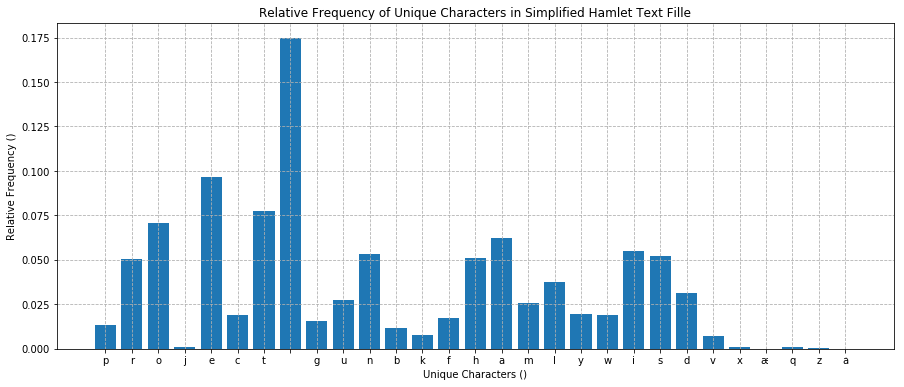

In [11]:
fig = plt.figure(figsize=(15,6)) # Customize plot size
ax = plt.subplot() # Subplot definition required to fully customize plot

ax.grid(linestyle='dashed') # Grid styple background
plt.xlabel('Unique Characters ()')
plt.ylabel('Relative Frequency ()')
plt.title('Relative Frequency of Unique Characters in Simplified Hamlet Text Fille')

plt.bar(letters, relFreq)
plt.show()

We certainly do not have a distribution that resembles the uniform distribution. Note the spike in frequency for the spacebar. There are really no surprises with this distribution, and as such it is time to compute the associated entropy. Similar to the relative frequency calculation, we are not dealing with exceptionally larger/ small numbers of our set has only 29 elements, so list comprehension should be acceptable to perform calculation (as opposed to using numpy).

In [12]:
H = [ - p*np.log(p) / np.log(2) for p in relFreq] # Formula [1] from above
total_H = np.sum(H) # Sum of H_i's

print('Total Entropy Of Spamlet [bits per key] : H =', total_H)

Total Entropy Of Spamlet [bits per key] : H = 4.125324568109067


We can compare this number, to a value calculated in our notes.

The quote 'To be, or not to be? That is the question—' was found to have Entropy [bits per key] = 4.755. It seems reasonable that a full text will would be less disordered than a single sentence, since a large collection of sentences are bound to share characteristics such as word sequences of different lengths.

### Question \#2: what is the probability that a monkey with a uniform random selection of 27-keys would produce Spamlet?  In other words, how many different sequences with 167774 characters are there?

Note: I am using full file (including header) so the sequence length is 181758 characters

The number of different sequences is the number of permutations of the 27 characters (alphabet and spacebar) where repetition is allowed. The first character of the sequence has 27 possibilities, as does the second, third, and so for. Using the multiplication rule from statistics, this is equal to:

$$ \text{Number of Sequences} = 27 x 27 x 27 x \dots x 27 = 27^{181758}$$

Where 181758 is the total number of characters in Spamlet.

This is a simple formula, however it is easy to see that the answer will be extremely large. We may have problems calculating it. We are interesting in the probability of randomly typing in Spamlet. Since there is only one possibility of this happening, the probability is simply 1 over the number of sequences.

In [13]:
num_seqs = 27**total_chars # 27^181758
prob_s = 1/num_seqs

#print(num_seqs) # Can be computed but result is ommitted from output as it's VERY long 
print('num_seqs type:', type(num_seqs)) # Uses the new "non-capped" int type in python

print('Prob = %.3e' % prob_s)
print('Python thinks the probability is equal to zero:', prob_s == 0)

num_seqs type: <class 'int'>
Prob = 0.000e+00
Python thinks the probability is equal to zero: True


It appears we are able to calculate the number of sequences, however when we calculate the probability the calculation result in zero. A common practice in computer science or statistical mechanics when dealing with extremely large values is to scale the value using logarithms. Theoretically, if we take the natural log of the number of sequences, determine the associated natural log of the probability, then we should be able to take the exponential of this number and produce the same result as direct calculation. 

$$ ln(\text{# Seq}) = ln(27^{181758}) = 181758 * ln(27) $$

In [14]:
ln_num_seqs = total_chars * np.log(27)
print('ln(Number of Sequences) =', ln_num_seqs)

ln(Number of Sequences) = 599044.7170912148


$$ p_s = \frac{1}{\text{# Seq}} \Rightarrow ln(p_s) = ln(\frac{1}{\text{# Seq}}) = ln(1) - ln(\text{# Seq}) = -ln(\text{# Seq}) $$

In [15]:
ln_prob_s = - ln_num_seqs
print(ln_prob_s)

-599044.7170912148


Now we must take the exponential of this number. Since it is neagtive and large, we expect an exponential very close to zero, which is consistent with our expectation of the probability of randomly typing Spamlet. 

$$ exp(ln(p_s)) = p_s = exp(-ln(\text{# Seq}))$$

In [16]:
prob_s = np.exp(ln_prob_s)
print(prob_s)

0.0


Well, we are right back to where we started. The problem here is that dividing by this huge number is so small that we keep getting zero.

I won't go into every detail of what I tried in order to resolve this problem, but I will say that it sent me on quite the journey. My line of thinking was that I could find something online regarding probability calculations or entropy calculations that would help me out.

Finally, I stumbled across a python package called decimals. I found this from:

$^2$ https://stackoverflow.com/questions/43084364/exponential-of-large-negative-numbers. 

The documentation can be found here:

$^3$ https://docs.python.org/2.7/library/decimal.html

This package allows for more memory to be allocated for storing the value of a number. The standard memory allocation for 32 and 64-bit floating point numbers is not enough for such a small number, and as such we need to perform the calculation using the help of software.

In [17]:
from decimal import *
getcontext() # print details of decimal object
# getcontext().prec = 30 <-- Changes precision to 30 decimal places

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

By default, the precision is 28, so all integers up to 9999999999999999999999999999 (28 nines) can be represented exactly. I played around with this however I believe since we can calculate our number of sequences without an issue, changing the precision is not required. The documentation states that a user specified number will have an exact value when a decimal object is instantiated. As in; we can save our number as a decimal without introducing rounding errors.

In [18]:
prob_s = Decimal(ln_prob_s).exp()
print('Probability of random typing Spamlet =', prob_s)
print(type(prob_s))

Probability of random typing Spamlet = 1.530925266663193407059055224E-260162
<class 'decimal.Decimal'>


Finally, we have arrived at a non zero result. We must verify that our result is reasonable. We know that the sum of all probablities should equal one.

In [19]:
sum_prob_s = prob_s * num_seqs
print('Sum of all probabilities=', sum_prob_s)

Sum of all probabilities= 1.000000000000771502043847288


It appears that we have lost precision along the line. In retrospect, using the default precision of 28 will introduce round-off error after 28 decimal places, and therefore the probability is not exact.

I believe for our purposes, it is sufficient to have attained the correct order of magnitude, which we have since the sum of all possibilities is quite close to 1.

As it turns out, my analysis using logarithms was not necessary when taking advantage of the decimal module. I again referenced the documentation was figured out how to perform the total probability calculation using the power function.

In [20]:
context = Context() # Instantiate decimal object in order to access instance method 'power'
p_s_decimal = 1/context.power(27,181758) # 1 / 27^181758

sum_ps_decimal = p_s_decimal * num_seqs # Sum of all probabilities. Verify it equals one with assertion
assert np.abs( sum_ps_decimal - 1 ) < 1e-6, 'Probabilities do not sum to 1'

print('Probability of randomly typing Spamlet using uniform key distribution:', p_s_decimal)

Probability of randomly typing Spamlet using uniform key distribution: 1.530925266662012295086848027E-260162


### Question \#3: how does the probability change if the chance of hitting any given key was not 1/27, but the same as the distribution of Spamlet?

In order to illustrate the effect that a non-uniform probability distribution has on the probability of producing a particular outcome, consider the word 'OGOPOGO'. We will calculate the relative frequency of each character then calculate the probability of selecting these characters in a random order than yields 'OGOPOGO'.

In [21]:
str1 = 'ogopogo'
ogo_letters, ogo_counts = catalogList(str1)
ogo_prob = [ int(c) / len(str1) for c in ogo_counts ]
assert np.abs( np.sum(ogo_prob) - 1 ) < 1e-6, 'Probabilities do not sum to 1'
print('Letters:', ogo_letters, '\nCounts: ', ogo_counts, '\nProbabilities:', ogo_prob )

Letters: ['o', 'g', 'p'] 
Counts:  [4, 2, 1] 
Probabilities: [0.5714285714285714, 0.2857142857142857, 0.14285714285714285]


Now we can calculate the probablility of randomly typing 'OGOPOGO' from the three key selection:

$$ \text{Probability} = \Big(\frac{4}{7}\Big) \Big(\frac{2}{7}\Big) \Big(\frac{4}{7}\Big) \Big(\frac{1}{7}\Big) \Big(\frac{4}{7}\Big) \Big(\frac{2}{7}\Big) \Big(\frac{4}{7}\Big)  $$

$$ \text{Probability} = \Big(\frac{4}{7}\Big)^4 \Big(\frac{2}{7}\Big)^2 \Big(\frac{1}{7}\Big) $$

I will express this probablility in anticipation of dividing by a large number and getting zero (which it is assumed would happen in the case of Spamlet)

$$ ln(\text{Probability}) = 4 [ln(4)-ln(7)] + 2 [ln(2) - ln(7)] + 1 [ln(1) - ln(7)] $$

$$ ln(\text{Probability}) = 4ln(4) + 2ln(2) + 1ln(1) - 7ln(7) $$

$$ ln(\text{Probability}) = \sum_{i=1}^n count_i * ln(count_i) - \text{total_chars} * ln(\text{total_chars})$$

Finally we take the exponential of $ln(P)$ to get P. let's try it out on our string.

In [22]:
prob_ogo1 = (4/7)**4 * (2/7)**2 * (1/7) # Direction calculation
ln_prob_ogo2 = np.sum( [ c * np.log(c) for c in ogo_counts ] ) - len(str1) * np.log(len(str1)) # ln(Probability)
prob_ogo2 = np.exp(ln_prob_ogo2)
assert np.abs(prob_ogo1 - prob_ogo2) < 1e-6, 'Probabilities not equal'

Directly computing the probability appears to be equivalent (within round off error) to the form I have expressed above. 
Let's compare the probability of typing our string using a uniform distribution to that of the 'keystroke' distribution.

In [23]:
# Given OGOPOGO has 7 total chars and 3 unique chars:
unif_prob = (1/3)**7
print('Probability of typing OGOPOGO given uniform distribution:', unif_prob)
print('Probability of typing OGOPOGO given the distribution provided by string:', prob_ogo1)

Probability of typing OGOPOGO given uniform distribution: 0.00045724737082761756
Probability of typing OGOPOGO given the distribution provided by string: 0.0012434080551956602


Note that there is a smaller probability that we would get our string when selecting the numbers based on a uniform distribution. This is consistent with our expectations, as weighting the probabilities to match how they actually appear in the string should provide a better chance of selecting the correct letters.

Now, let's perform the same calculation on spam, using the keystroke distribution as probabilities.

In [24]:
# Recall from above this is the data we are working with:
letters, counts = catalogList(spamlet)

print(letters)
print(counts)

['p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 'n', 'b', 'k', 'f', 'h', 'a', 'm', 'l', 'y', 'w', 'i', 's', 'd', 'v', 'x', 'æ', 'q', 'z', 'à']
[2461, 9139, 12856, 200, 17565, 3410, 14065, 31747, 2849, 4983, 9739, 2110, 1415, 3124, 9245, 11324, 4644, 6862, 3554, 3425, 10005, 9449, 5675, 1347, 206, 1, 230, 127, 1]


We can use the total counts for each character to calculate the associated probabilities. 

In [25]:
char_probs = [ c / total_chars for c in counts ] # Get probability each of character

# Test that first entry is equal to direct calculation of probability
assert abs(char_probs[0] - (2461.0/181758)) < 1e-6, 'Char probabilities not calculated correctly'

# ln(p_i) = count_i * ln( count_i )
ln_prob_count = [ counts[i] * np.log(counts[i]) for i in range(len(counts))]
assert abs( ln_prob_count[0] - (2461 * np.log(2461)) ) < 1e-6, 'ln(prob^count) not calculated correctly'

In [26]:
# Display Calculated values using Pandas Table
import pandas as pd

df1 = pd.DataFrame({
    'Chars': letters,
    'Counts': counts,
    'Prob' : char_probs,
    'Count*ln(Count)': ln_prob_count
})

print('Calculated Probabilities for Spamlet Keystroke Distribution\n', df1)

Calculated Probabilities for Spamlet Keystroke Distribution
    Chars  Count*ln(Count)  Counts      Prob
0      p     19216.283027    2461  0.013540
1      r     83350.478812    9139  0.050281
2      o    121637.891306   12856  0.070731
3      j      1059.663473     200  0.001100
4      e    171674.400514   17565  0.096639
5      c     27738.534415    3410  0.018761
6      t    134341.070000   14065  0.077383
7           329075.227335   31747  0.174666
8      g     22663.006780    2849  0.015675
9      u     42424.202606    4983  0.027416
10     n     89441.940958    9739  0.053582
11     b     16150.875208    2110  0.011609
12     k     10265.662006    1415  0.007785
13     f     25138.420352    3124  0.017188
14     h     84423.843640    9245  0.050864
15     a    105705.912314   11324  0.062303
16     m     39210.830756    4644  0.025550
17     l     60617.221481    6862  0.037753
18     y     29056.896297    3554  0.019553
19     w     27875.584371    3425  0.018844
20     i     92

In [27]:
ln_total_prob = np.sum(ln_prob_count) - total_chars * np.log(total_chars)
print(ln_total_prob)

-519729.20236029057


Just as before, we anticipate that the exponential of this large negative number will result in zero probabilty, and therefore make use of the Decimal package.

In [28]:
context = Context() # Instantiate decimal object in order to access instance method 'power'
total_prob = context.power(Decimal(1).exp(), Decimal(ln_total_prob))

print('Probability of randomly typing Spamlet with uniform distribution =', p_s_decimal) # uniform distribution
print('Probability of randomly typing Spamlet with keystroke distribution =', total_prob) # Keystroke distribution

Probability of randomly typing Spamlet with uniform distribution = 1.530925266662012295086848027E-260162
Probability of randomly typing Spamlet with keystroke distribution = 2.987658449818367804225452793E-225716


Note that the uniform distribution has a lower probability than that of the keystroke distribution. This is what we found with the OGOPOGO example and is consistent with our expectations. Still ridiculously small!

### Question \#4: determine the joint probability of each 2-key sequence eg. 'aa', 'ab', 'ac' from Spamlet.  How does the probability of producing Spamlet change if the monkey hits keys according to this distribution?

First off, we need to create a list of 2-key sequences from Spamlet.

In [29]:
spamlet_chunks_two = [] # Define array to store 2-key sequences

for i in range(len(spamlet)-1):
    spamlet_chunks_two.append(spamlet[i] + spamlet[i+1]) # Parse the character from Spamlet and add, 2 at a time, to list
    
# Check to make sure the last 2-key sequence matches the last 2 characters from Spamlet
assert spamlet_chunks_two[-1] == spamlet[-2] + spamlet[-1] # Python compares string lexicographically
# Check to make sure length of list is consistent with expectations
assert len(spamlet_chunks_two) == (len(spamlet) - 1) # Chopped list should be one less than spamlet

In [30]:
print(spamlet_chunks_two[0:10]) # Let's see what we are working with

['pr', 'ro', 'oj', 'je', 'ec', 'ct', 't ', ' g', 'gu', 'ut']


Now, we can use the catalogList function to identify unique 2-key sequences and their respective counts.

In [31]:
two_letter_seq, two_letter_counts = catalogList(spamlet_chunks_two) # List of unique 2-key sequences and their counts

# Take a look at first few sequences and values
print(two_letter_seq[0:10])
print(two_letter_counts[0:10])

['pr', 'ro', 'oj', 'je', 'ec', 'ct', 't ', ' g', 'gu', 'ut']
[401, 794, 89, 128, 420, 332, 4109, 780, 237, 682]


In [32]:
num_seqs = len(two_letter_seq) # Total number of unique 2-letter sequences
print('Total number of unique 2-key sequences:', num_seqs)

Total number of unique 2-key sequences: 565


Next, we will determine the probability of each 2-key sequence, as found in Spamlet, and calculate the probability that randomly selecting from these sequences will yield Spamlet. This is done in the same manner as #2 above.

In [33]:
seq_probs = [ count / num_seqs for count in two_letter_counts ] # Get probability each of 2-letter sequence

# Compare results to a direct calculation
assert np.abs( seq_probs[0] - (401/565) ) < 1e-6, 'Char probabilities not calculated correctly'

# ln(p_i) = count_i * ln( count_i )
count_ln_count = [ two_letter_counts[i] * np.log(two_letter_counts[i]) for i in range(len(two_letter_counts))]

# Compare results to a direct calculation
assert np.abs( count_ln_count[0] - (401 * np.log(401)) ) < 1e-6, 'ln(prob^count) not calculated correctly'

df2 = pd.DataFrame({
    '2 Symbol Seq': two_letter_seq,
    'Counts': two_letter_counts,
    'Prob' : seq_probs,
    'Count*ln(Count)': count_ln_count
})

print(df2.head(10), '\n\n', df2.tail(10)) # Take a peek at the first few and last few values

  2 Symbol Seq  Count*ln(Count)  Counts      Prob
0           pr      2403.578532     401  0.709735
1           ro      5301.604268     794  1.405310
2           oj       399.488637      89  0.157522
3           je       621.059874     128  0.226549
4           ec      2536.906979     420  0.743363
5           ct      1927.304810     332  0.587611
6           t      34190.721787    4109  7.272566
7            g      5194.249257     780  1.380531
8           gu      1295.930253     237  0.419469
9           ut      4450.070227     682  1.207080 

     2 Symbol Seq  Count*ln(Count)  Counts     Prob
555           xb         0.000000       1  0.00177
556           kf         0.000000       1  0.00177
557           tx         0.000000       1  0.00177
558           cp         0.000000       1  0.00177
559           kc         1.386294       2  0.00354
560           cb         0.000000       1  0.00177
561           wc         0.000000       1  0.00177
562           pg         3.295837      

In [34]:
# We want every odd 2-key sequence in our list, in order to properly recreate Spamlet
# Note that since total number of characters is even we won't run until an issue of missing one
odd_count_ln_count = [ count_ln_count[2*i] for i in range( int( len(count_ln_count)/2) ) ]

assert np.abs( len(odd_count_ln_count) - total_chars/2 )

In [35]:
ln_seq_prob = np.sum(odd_count_ln_count) - (int(total_chars/2)) * np.log(int(total_chars/2))
print(ln_seq_prob)

-437853.26205005497


Once again, we will use decimal module to avoid getting zero, since it is expected that the probability will be very small.

In [36]:
tot_seq_prob = context.power(Decimal(1).exp(), Decimal(ln_seq_prob))

print('Probability of randomly selecting 2-letter sequencies from text will generate Spamlet =', tot_seq_prob)
print('Probability of randomly typing Spamlet with uniform distribution =', prob_s) # uniform distribution
print('Probability of randomly typing Spamlet with keystroke distribution =', total_prob) # Keystroke distribution

Probability of randomly selecting 2-letter sequencies from text will generate Spamlet = 5.551474159268781393184548654E-190158
Probability of randomly typing Spamlet with uniform distribution = 1.530925266663193407059055224E-260162
Probability of randomly typing Spamlet with keystroke distribution = 2.987658449818367804225452793E-225716


We see that the probability getting Spamlet using of randomly selecting from 2-key sequences is higher than either the uniform distribution or single key distribution. This makes sense, as it limits the options while still allowing for Spamlet to be created.

### Question \#5: write a program to generate sequences of text that sound somewhat like Shakespeare.  See for inspiration http://www.elsewhere.org/journal/pomo/ 

The following is an outline for my text generator.

    1 - Generate seed list/ probability distribution and select random seed
    2 - Generate list of 4-word sequences that start with seed and calculate the probability distribution found in text. 
      - Select randomly from this and add to quote.
    3 - Generate lit of 2-word sequences that start with the last word of quote (so far) and end with a period/ calculate the    probability distribution. Select boolen randomly based on this distribution, which dictates if algorithm continues.
    4 - Repeat steps 2-3 until boolean result ends sequence.
    
We will again use the Spamlet data. In order to perform each step of the algorithm some data manipulation is required:

    1 - Pull a string to be used as a model for the generator
    2 - Get a list containing words from the string (with periods) and determine unique words/ counts
    3 - Get a list containing words from the string (without periods) and determine unique words/ counts
    4 - Make list of 2-word and 4-word (incl period) sequences
    
We will first define all functions necessary, then manipulate the data, and finally define a function that performs the algorithm.

In [37]:
def sentenceSeed(word_arr):
    '''
    Generates list of words that occur after a decimal in word/ period array parameter. 
    Note: First word of first sentence is ignored to simplify the process
    Parameters
        word_arr: Array containing words and periods from text file (in original ordering)
    Returns
        List of words that come after a period.
    '''
    beg_words = [] # Return list
    for i in range(len(word_arr)-1): # Parse the array until second last element
        if word_arr[i] == '.': # If a period is encountered
            beg_words.append(word_arr[i+1]) # Add next word to return list
    return beg_words

Next, we need a function that simplifies a string by removing punctuation and converts to lower case.

In [38]:
# Simplify by stripping punctuation and converting to lower case.
def simplifyString(string, period=False):
    '''
    Function simplfies string by stripping punctuation and converting to lower case.
    Parameters
        string: String to be simplified
        period: Optional parameter to specifiy if periods should be included in simplified string
    Returns
        Simplified string
    '''
    
    if period == False:
        return [c.lower() for c in string if c.isalpha() or c==' ']
    else:
        return [c.lower() for c in string if c.isalpha() or c==' ' or c=='.']

Next, a function that parses the source string and creates a list of each word encountered.

In [39]:
def wordList(string, periods=False):
    '''
    Function converts string into a list of words, in same ordering.
    Parameters
        string: String to be parsed
        period: Optional argument indicates if periods should be added to list
    '''
    sub_str = '' # Sub string to hold individual word
    word_list = [] # Return list
    i = 0 # Index used to verify the last word is added to return list
    
    # For loop parses the string add determines begining and end of a word, then adds to return list
    for letter in string:
        if (letter != ' ')  and (letter != ',') and (letter != ';'):
            
            if((letter != '.')): # If symbol isn't space or punctuation
                sub_str += letter  # Then add to sub string
                
            elif (periods == True): # If periods are to be considered
                word_list.append(sub_str) # Sub string is already a word, so add to list
                word_list.append(".") # Add a period to list
                sub_str = '' # Reset sub string
        
        if i == len(string)-1: # If end of string is reached, add final word to return list
            word_list.append(sub_str)
        
        if letter == ' ': # If space if encountered, add word to return list
            word_list.append(sub_str)
            sub_str = '' # Reset sub string
        
        i += 1 # Increment
        
    return word_list

Next, we need a function that will determine if the random sequence should end.

In [40]:
def possibleEnd(word, chunks_with_periods):  
    '''
    Function checks how many times the argument word occurs in a 2-word/ period sequence contained
    in chunks_with_period argument
    Parameters
        word: element to be found in chunks_with_periods
        chunks_with_periods: List with elements that are 2 elements lists 
    Returns
        Ramonly generated boolean which is used in sequence termination decision
    '''
    
    multiplicity = 0 # Number of times word occurs as first element in chunks_with_periods
    multiplicity_end = 0 # Number of times a period follows elements that contain word as first element
    
    # Check if word occurs in first position of each element. If it does, incremement occurence count
    # If it is followed by a period, increment sentence end count
    for seq in chunks_with_periods:
        if word == seq[0]:
            multiplicity += 1
            if seq[1] == '.':
                multiplicity_end +=1
    if multiplicity != 0:            
        prob_end = float(multiplicity_end) / multiplicity # Calculate probability that word is found at end of sentence
    else:
        prob_end = 0.0
    # Randomly select and return boolean, based on probability that word occurs at end of sentence
    return np.random.choice( [True, False], size=1, p= [prob_end, 1-prob_end] )[0] # Index pulls boolean from result

With the above functions we can begin the real work of manipulating the data which will be used in the sequence generating algorithm.

In [41]:
# 1 - Pull a string to be used as a model for the generator
source_str = generateFromText('hamlet.txt', pull=False)

# 2 - Get a list containing words from the string (with periods) and determine unique words/ counts
str_words = wordList(source_str, periods=True) # break the string into words
words_periods = simplifyString(str_words, period=True) # Simplify word list, keep periods
letters_and_periods, counts1 = catalogList(words_periods) # get unique words (including period) and counts

#3 - Get a list containing words from the string (without periods) and determine unique words/ counts
str_words = wordList(source_str) # break the string into words
words1 = simplifyString(str_words) # make lower case
letters1, counts1 = catalogList(words1) # Get unique words and counts

#4 - Make list of 2-word and 4-word (incl period) sequences
chunks_with_periods = [ [words_periods[i], words_periods[i+1]] for i in range(len(words_periods)-1) ] # 2-word sequences
chunks_arr = [ [words1[i], words1[i+1], words1[i+2], words1[i+3]] for i in range(len(words1)-3) ] # 4-word sequences

In [42]:
def randomSelector(simp_list, random_index=False):
    '''
    Function makes random selection of values in a list based on the porbability observed in list
    Parameters
        simpl_list: List of simplified words
        random_index: If True then random index is generated, rather than values of list elements
    Returns
        Randomly generated value or index
    '''
    alist, counts = catalogList(simp_list) # Determine unique words and counts
    probab = [ float(count) / len(simp_list) for count in counts] # Calc seed probability distribution
    if random_index == True: # index is desired randomly select index from possible indices of alist
        return np.random.choice( list(range(len(alist))), size=1, p= probab )[0]
    else: # If value is desired, randomly select element from alist
        return np.random.choice( alist, size=1, p= probab )[0]

In [43]:
def hamletQuotes():
    my_quote = '' # Initialize string
    
    #1 - Generate seed list/ probability distribution and select random seed:
    seeds = sentenceSeed(words_periods) # Generate list of first word seeds 
    simpl_seeds = simplifyString(seeds) # Simplify seed list
    
    seed = randomSelector(simpl_seeds) # Make random selection of seed to be used
    my_quote += seed.title() + ' '  # .title() makes first letter capital. Add to quote

    #2 - Generate list of 4-word sequences that start with seed/ probability distribution.
    # Select randomly from this and add to quote
    while True:
        possible_next = []

        # Find all instances where the seed appears as the first word, in the chunks of 4
        for seq in chunks_arr:
            if (seed == seq[0]) and (seed != seq[1]):
                possible_next.append( [ seq[1], seq[2], seq[3] ] )

        # If there are no 4-word sequences with the seed at first position then end sequence.
        if len(possible_next) < 1:
            break

        # Pull the last word from each of the possible chunks
        end_possible_next = [ possible_next[i][2] for i in range( len(possible_next) ) ]

        index = randomSelector(end_possible_next, random_index=True) # Randomly select from possible_next list
        
        # Add to quote
        my_quote += possible_next[index][0] + ' ' + possible_next[index][1] + ' ' + possible_next[index][2] + ' '

        # 3- Generate list of 2-word sequences that start with last word of quote (so far) and end with a period/ calc
        # probability distribution. Select boolean randomly based on this distribution
        if possibleEnd(possible_next[index][2], chunks_with_periods) == True:
            break
        
        # Update "seed" to last word in our sequence
        seed = possible_next[index][2]

    my_quote = my_quote.strip() # Remove trailing whitespace
    my_quote += '.' # End sequence with a period
    return my_quote

Now that we have everything in place let's run it a few times:

In [83]:
for i in range(3):
    print('Random Sequence of Text:', hamletQuotes(), '\n')

Random Sequence of Text: They deserve the more good my lord. 

Random Sequence of Text: And at last upon your own liberty. 

Random Sequence of Text: The rest of for herself for thou art him go. 



The text generator seems to be doing a reasonably good job. Let's see if we can break it by running it 1000 times.

In [45]:
#for i in range(1000):
#    hamletQuotes()

This loop was run several times and no exception was thrown, so it suggests that the code is solid.

When this problem was approached, it seemed clear that randomly selecting words from a text file would not produce the most coherent sentences. To produce results that somewhat resembled sentences found in Shakespeare, there had to be "smart" decisions for which words to select. A simplistic approach was employed to find the words that could be used at the start of a sentence; we simply used words that were found to start sentences! Clearly this is limited the options, however it provided our first smart decision.

Appending chunks of 4-word sequences, which started with the seed, felt like cheating. However, it ensured that at the very least, sub sections of the sequence would be coherent. Since Spamlet contains a relatively large number of words, we do not see a heavy amount of repetition.

Finally, calculating the probabilities that the last word would be followed by a period, proved sufficient as a termination clause.

To make this a better text generator, the next step would be to add in some grammar rules, for which verbs, nouns, etc. would have to be identified. It is interesting to note that generating "random" sequences of text actually requires very non-random decision points. I suppose this is obvious, however it becomes much clearer after going through an exercise like this.

## Conclusion

Our probabilistic analysis of entropy required the help of an external package, in order to handle the extremely low probabilities involved. Direct computation proved insufficient. This idea can be applied to many different areas of research for physics in general. To learn more about the quantum world, indirect measurements are made. Astrophysicists have pushed the bounds for what they can see and employ many different "indirect" approaches to observe and detect what lies beyond. Thus, thinking outside the box is an important skill for us to have. 

As mentioned in the start of this report, any chance to learn more about stats and probability is a golden opportunity. It is a little odd that STATS courses are not a requirement in the undergraduate physics program, so it seems essential that we learn a little bit about it in each of our courses. 

Finally, we used probability distributions to generate apparent random sequences of text. As discussed in class, it can be said that randomness lies in the eye of the beholder. That is; a process may appear random, yet when all the variables are known, it turns out to be completely deterministic. With the sequence generator, the bulk of the work in this report was to implement an algorithm that included a random component, but was in fact very structured as to produce "smart" results. I may have strayed a little far from the idea/ concept of randomness in this report but learned a lot. If I had time to stay on this subject for a while, I would like to learn more about how probability distributions are represented within the computer’s memory.

### References
$[1]$ - https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)

$[2]$ https://stackoverflow.com/questions/43084364/exponential-of-large-negative-numbers. 

$[3]$ https://docs.python.org/2.7/library/decimal.html